# Fuzzy Rule-Based System

In [1]:
from yield_prediction_system import YieldPredictionSystem

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data.
df_system = pd.read_csv('../data/rice-yield-clean-data.csv')

# Initialize the fuzzy system.
# The t-norm and t-conorm can be chosen among ("min", "max"), ("product", "sum") and ("lukasiewicz", "lukasiewicz").
fuzzy_system = YieldPredictionSystem(data=df_system, t_norm='product', t_conorm='sum')

In [3]:
# Checking if everything is loaded correctly
print(fuzzy_system.panicle_datapoints)
print(fuzzy_system.growth_datapoints)
print(fuzzy_system.yield_datapoints)
print(fuzzy_system.t_norm.__name__, fuzzy_system.t_conorm.__name__)

{'min': 2.55, 'pct10': 2.895, 'pct25': 3.06375, 'pct50': 3.3075, 'pct75': 3.75, 'pct90': 4.295999999999999, 'max': 5.115}
{'min': 123.4, 'pct10': 135.0, 'pct25': 142.0, 'pct50': 154.0, 'pct75': 160.72500000000002, 'pct90': 175.97, 'max': 191.5}
{'min': 6.4011, 'pct10': 7.71381, 'pct25': 8.403375, 'pct50': 8.855699999999999, 'pct75': 9.41925, 'pct90': 10.099499999999999, 'max': 11.19}
t_norm_product t_conorm_sum


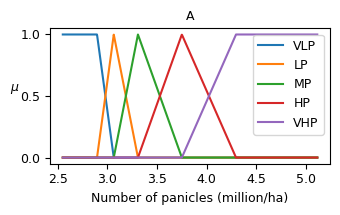

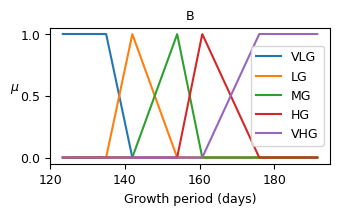

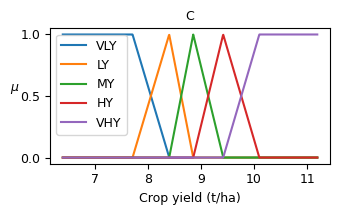

In [4]:
# Plot the membership functions.
fuzzy_system.plot_panicle_membership_functions(figsize=(3.5,2.25), title='A', fontsize=9)
fuzzy_system.plot_growth_membership_functions(figsize=(3.5,2.255), title='B', fontsize=9)
fuzzy_system.plot_yield_membership_functions(figsize=(3.5,2.25), title='C', fontsize=9)

## Fuzzification

In [5]:
# Fuzzify the input data.
fuzzy_system.fuzzify_input()
fuzzy_system.data.head(6)

,panicle,growth,yield,VLP,LP,MP,HP,VHP,VLG,LG,MG,HG,VHG
0,3.975,184.0,7.5000,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000
1,3.975,184.0,6.7500,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000
2,2.850,125.0,6.4275,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
3,4.500,147.5,7.2285,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.541667,0.458333,0.000000,0.000000
4,5.100,167.5,8.7150,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.555592,0.444408
5,3.675,180.0,7.7820,0.0,0.0,0.169492,0.830508,0.000000,0.0,0.000000,0.000000,0.000000,1.000000


## Rule base and evaluation of rules

Define rule base using the results from (Li et al., 2019).

In [6]:
fuzzy_system.rules = [
            ['AND', 'VLP', 'VLG', 'VLY'],
            ['AND', 'VLP', 'LG', 'LY'],
            ['AND', 'VLP', 'MG', 'LY'],
            ['AND', 'VLP', 'HG', 'MY'],
            ['AND', 'VLP', 'VHG', 'MY'],

            ['AND', 'LP', 'VLG', 'VLY'],
            ['AND', 'LP', 'LG', 'LY'],
            ['AND', 'LP', 'MG', 'LY'],
            ['AND', 'LP', 'HG', 'MY'],
            ['AND', 'LP', 'VHG', 'MY'],

            ['AND', 'MP', 'VLG', 'LY'],
            ['AND', 'MP', 'LG', 'MY'],
            ['AND', 'MP', 'MG', 'MY'],
            ['AND', 'MP', 'HG', 'HY'],
            ['AND', 'MP', 'VHG', 'HY'],

            ['AND', 'HP', 'VLG', 'LY'],
            ['AND', 'HP', 'LG', 'MY'],
            ['AND', 'HP', 'MG', 'MY'],
            ['AND', 'HP', 'HG', 'HY'],
            ['AND', 'HP', 'VHG', 'HY'],

            ['AND', 'VHP', 'VLG', 'MY'],
            ['AND', 'VHP', 'LG', 'MY'],
            ['AND', 'VHP', 'MG','HY'],
            ['AND', 'VHP', 'HG', 'VHY'],
            ['AND', 'VHP', 'VHG', 'VHY'],
        ]

fuzzy_system.evaluate_rules(fuzzy_system.rules, fuzzy_system.data)
fuzzy_system.data.head(6)


,panicle,growth,yield,VLP,LP,MP,HP,VHP,VLG,LG,MG,HG,VHG,pred_VLY,pred_LY,pred_MY,pred_HY,pred_VHY
0,3.975,184.0,7.5000,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.587912,0.412088
1,3.975,184.0,6.7500,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.587912,0.412088
2,2.850,125.0,6.4275,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000
3,4.500,147.5,7.2285,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.541667,0.458333,0.000000,0.000000,0.0,0.0,0.541667,0.458333,0.000000
4,5.100,167.5,8.7150,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.555592,0.444408,0.0,0.0,0.000000,0.000000,0.753090
5,3.675,180.0,7.7820,0.0,0.0,0.169492,0.830508,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.859236,0.000000


## Defuzzification

In [7]:
fuzzy_system.defuzzify_yield()

pd.options.display.max_columns = None
fuzzy_system.data.head(6)

,panicle,growth,yield,VLP,LP,MP,HP,VHP,VLG,LG,MG,HG,VHG,pred_VLY,pred_LY,pred_MY,pred_HY,pred_VHY,predicted_crisp_yield
0,3.975,184.0,7.5000,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.587912,0.412088,10.013598
1,3.975,184.0,6.7500,0.0,0.0,0.000000,0.587912,0.412088,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.587912,0.412088,10.013598
2,2.850,125.0,6.4275,1.0,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,7.240585
3,4.500,147.5,7.2285,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.541667,0.458333,0.000000,0.000000,0.0,0.0,0.541667,0.458333,0.000000,9.206155
4,5.100,167.5,8.7150,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.555592,0.444408,0.0,0.0,0.000000,0.000000,0.753090,10.426686
5,3.675,180.0,7.7820,0.0,0.0,0.169492,0.830508,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.859236,0.000000,9.458829


In [8]:
# RMSE of the predicted crisp yield
RMSE_predicted_vs_real = np.sqrt(np.mean((fuzzy_system.data['yield'] - fuzzy_system.data['predicted_crisp_yield'])**2))
RMSE_predicted_vs_real

0.8605971904020628

## Plots for the text

In [9]:
import matplotlib.ticker as ticker

# Plot yield membership functions

figsize = (10,3)
fontsize = 10

x = np.linspace(fuzzy_system.yield_datapoints['min'], fuzzy_system.yield_datapoints['max'], 1000)
y_VLY = [fuzzy_system.mu_VLY(x_i) for x_i in x]
y_VLY_min = [min(fuzzy_system.mu_VLY(x_i), 0.0) for x_i in x]
y_LY = [fuzzy_system.mu_LY(x_i) for x_i in x]
y_LY_min = [min(fuzzy_system.mu_LY(x_i), 0.0) for x_i in x]
y_MY = [fuzzy_system.mu_MY(x_i) for x_i in x]
y_MY_min = [min(fuzzy_system.mu_MY(x_i), 0.541667) for x_i in x]
y_HY = [fuzzy_system.mu_HY(x_i) for x_i in x]
y_HY_min = [min(fuzzy_system.mu_HY(x_i),  0.458333) for x_i in x]
y_VHY = [fuzzy_system.mu_VHY(x_i) for x_i in x]
y_VHY_min = [min(fuzzy_system.mu_VHY(x_i), 0.0) for x_i in x]
y_max = [max(y_VLY_min[i], y_LY_min[i], y_MY_min[i], y_HY_min[i], y_VHY_min[i]) for i in range(len(y_VLY))]


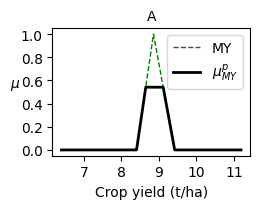

In [10]:
plt.figure(figsize=(2.7,2.2))

plt.plot(x, y_MY, label='MY', linestyle='--', color='green', linewidth=1)
plt.plot(x, y_MY_min, label='$\mu_{MY}^p$', linestyle='-', linewidth=2, color='black')

plt.xlabel('Crop yield (t/ha)', fontsize=fontsize)
plt.ylabel('$\mu$', fontsize=fontsize, rotation=0)
plt.xticks(list(range(7, 12)),fontsize=fontsize)
plt.yticks(np.linspace(0.0, 1.0, 6), fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title('A', fontsize=fontsize)

plt.tight_layout()
plt.show()

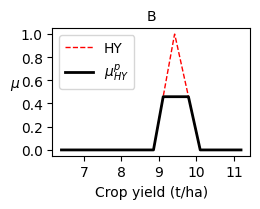

In [11]:
plt.figure(figsize=(2.7,2.2))

plt.plot(x, y_HY, label='HY', linestyle='--', color='red', linewidth=1)
plt.plot(x, y_HY_min, label='$\mu_{HY}^p$', linestyle='-', linewidth=2, color='black')

plt.xlabel('Crop yield (t/ha)', fontsize=fontsize)
plt.ylabel('$\mu$', fontsize=fontsize, rotation=0)
plt.xticks(list(range(7, 12)),fontsize=fontsize)
plt.yticks(np.linspace(0.0, 1.0, 6), fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.title('B', fontsize=fontsize)

plt.tight_layout()
plt.show()

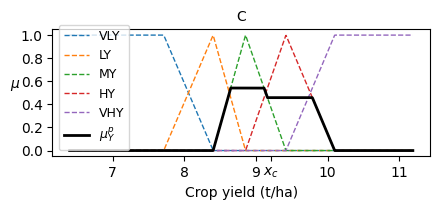

In [12]:

fig = plt.figure(figsize=(4.5,2.2))
ax = fig.add_subplot(111)

plt.plot(x, y_VLY, label='VLY', linestyle='--', linewidth=1)
plt.plot(x, y_LY, label='LY', linestyle='--', linewidth=1)
plt.plot(x, y_MY, label='MY', linestyle='--', linewidth=1)
plt.plot(x, y_HY, label='HY', linestyle='--', linewidth=1)
plt.plot(x, y_VHY, label='VHY', linestyle='--', linewidth=1)
plt.plot(x, y_max, label='$\mu_Y^p$', linestyle='-', linewidth=2, color='black')

plt.xlabel('Crop yield (t/ha)', fontsize=fontsize)
plt.ylabel('$\mu$', fontsize=fontsize, rotation=0)
plt.xticks(list(range(7, 12)) + [9.21],fontsize=fontsize)
def fmt(x, pos):
    return int(x) if x in range(7, 12) else '$x_c$'
ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt))
plt.yticks(np.linspace(0.0, 1.0, 6), fontsize=fontsize)
plt.legend(fontsize=9)
plt.title('C', fontsize=fontsize)

plt.tight_layout()
plt.show()

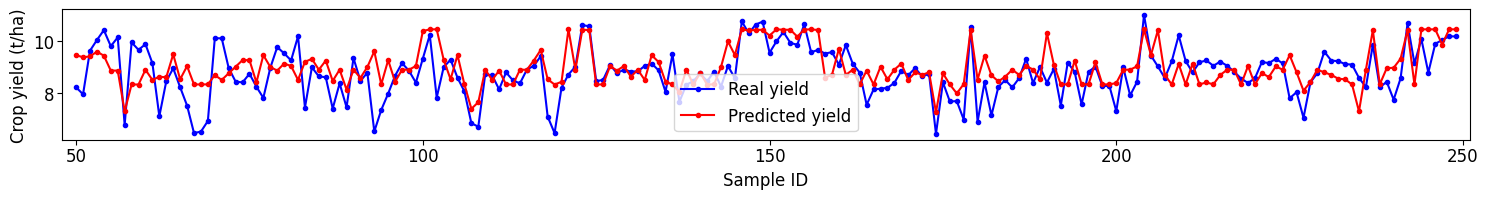

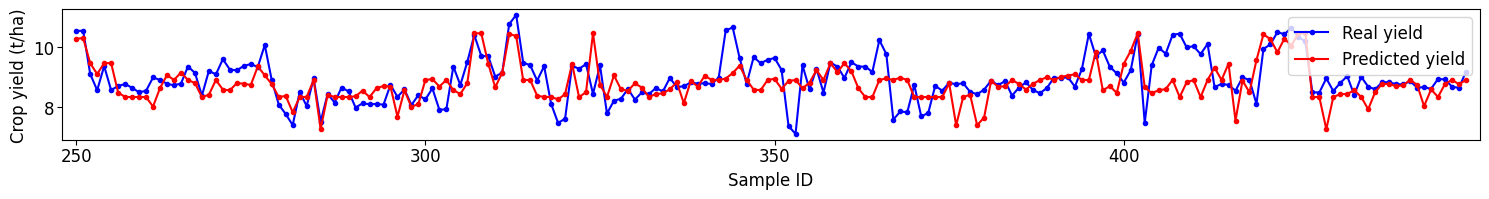

In [13]:
from matplotlib import pylab

pylab.rcParams['xtick.major.pad']='2'
pylab.rcParams['ytick.major.pad']='2'
plt.rcParams['axes.xmargin'] = 0.01

# plot real vs predicted yield
plt.figure(figsize=(15,2.1))
plt.plot(df_system['yield'][50:250], linestyle='-', marker='.', color='blue', label='Real yield', linewidth=1.5)
plt.plot(df_system['predicted_crisp_yield'][50:250], linestyle='-', marker='.', color='red', label='Predicted yield', linewidth=1.5)
plt.xticks(list(range(50, 251, 50)),fontsize=12)
plt.xlabel('Sample ID', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Crop yield (t/ha)', fontsize=12, rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,2.1))
plt.plot(df_system['yield'][250:450], linestyle='-', marker='.', color='blue', label='Real yield', linewidth=1.5)
plt.plot(df_system['predicted_crisp_yield'][250:450], linestyle='-', marker='.', color='red', label='Predicted yield', linewidth=1.5)
plt.xticks(list(range(250, 450, 50)),fontsize=12)
plt.xlabel('Sample ID', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Crop yield (t/ha)', fontsize=12, rotation=90)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
